<a href="https://colab.research.google.com/github/Jiangjiang-111/-/blob/main/%E7%AC%AC%E4%B8%89%E7%AB%A0%E6%A8%A1%E5%9E%8B%E5%BB%BA%E7%AB%8B%E5%92%8C%E8%AF%84%E4%BC%B0_%E8%AF%84%E4%BB%B7_%E8%AF%BE%E7%A8%8B(done%EF%BC%81).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 第三章 模型搭建和评估-评估

根据之前的模型的建模，我们知道如何运用sklearn这个库来完成建模，以及我们知道了的数据集的划分等等操作。那么一个模型我们怎么知道它好不好用呢？以至于我们能不能放心的使用模型给我的结果呢？那么今天的学习的评估，就会很有帮助。

加载下面的库

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
%matplotlib inline

In [4]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.rcParams['figure.figsize'] = (10, 6)  # 设置输出图片大小

**任务：加载数据并分割测试集和训练集**

In [5]:
#写入代码
from sklearn.model_selection import train_test_split

In [8]:
#写入代码
# 一般先取出X和y后再切割，有些情况会使用到未切割的，这时候X和y就可以用,x是清洗好的数据，y是我们要预测的存活数据'Survived'
data = pd.read_csv('/content/drive/MyDrive/hands-on-data-analysis-master/第三章项目集合/clear_data.csv')
train = pd.read_csv('/content/drive/MyDrive/hands-on-data-analysis-master/第三章项目集合/train.csv')
X = data
y = train['Survived']


In [9]:
#写入代码
# 对数据集进行切割
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [10]:
#写入代码
# 默认参数逻辑回归模型
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

### 模型评估

* 模型评估是为了知道模型的泛化能力。
* 交叉验证（cross-validation）是一种评估泛化性能的统计学方法，它比单次划分训练集和测试集的方法更加稳定、全面。
* 在交叉验证中，数据被多次划分，并且需要训练多个模型。
* 最常用的交叉验证是 k 折交叉验证（k-fold cross-validation），其中 k 是由用户指定的数字，通常取 5 或 10。
* 准确率（precision）度量的是被预测为正例的样本中有多少是真正的正例
* 召回率（recall）度量的是正类样本中有多少被预测为正类
* f-分数是准确率与召回率的调和平均

【思考】：将上面的概念进一步的理解，大家可以做一下总结



In [ ]:
#思考回答：



#### 任务一：交叉验证
* 用10折交叉验证来评估之前的逻辑回归模型
* 计算交叉验证精度的平均值

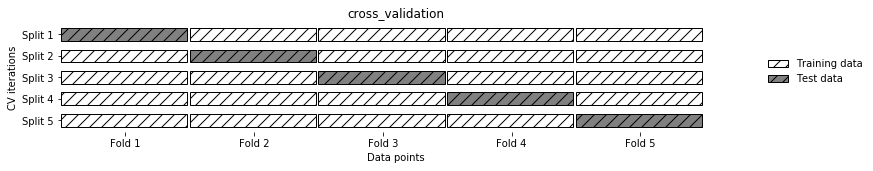

In [ ]:
#提示：交叉验证
Image('Snipaste_2020-01-05_16-37-56.png')

#### 提示4
* 交叉验证在sklearn中的模块为`sklearn.model_selection`

In [11]:
#写入代码
from sklearn.model_selection import cross_val_score


In [ ]:
#写入代码
lr = LogisticRegression(C=100)
scores = cross_val_score(lr, X_train, y_train, cv=10)

In [14]:
#写入代码
scores


array([0.82089552, 0.74626866, 0.74626866, 0.79104478, 0.86567164,
       0.8358209 , 0.76119403, 0.80597015, 0.74242424, 0.74242424])

In [15]:
#写入代码
# 平均交叉验证分数
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.79


#### 思考4
* k折越多的情况下会带来什么样的影响？

【回答】K折越多,单次训练验证时,用作训练集的数据就会越多,而用作验证集的数据越少。这样平均的结果会更加可靠,但是所耗费的总时间也会增多。

In [ ]:
#思考回答
scores = cross_val_score(lr, X_train, y_train, cv=100)

In [ ]:
scores


In [30]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.80


#### 任务二：混淆矩阵
* 计算二分类问题的混淆矩阵
* 计算精确率、召回率以及f-分数

【思考】什么是二分类问题的混淆矩阵，理解这个概念，知道它主要是运算到什么任务中的

【回答】

**混淆矩阵**是二分类问题的评价标准

混淆矩阵由如下两个维度构成：`样本的实际标签`和`样本被模型预测出来的标签`。


| 实际 | 预测为正样本 |	预测为负样本 |
| ---- | ---- |	---- |
| 实际为正样本 |	True Positive (TP) |	False Negative (FN) |
|实际为负样本 |	False Positive (FP) |	True Negative (TN) |

**精确度** precision 表示在所有预测为正的样本中，有多少是实际也是正的

precision = TP / (TP+FP)
  
**召回率** recall 表示在实际为正的样本中，有多少被预测为正

recall = TP / (TP+FN)

**F1 Score** 它是一个把精确度和召回率综合起来的指标，其实就是他们俩的调和平均数

F1 = 2 * Precision * Recall / (Precision + recall)


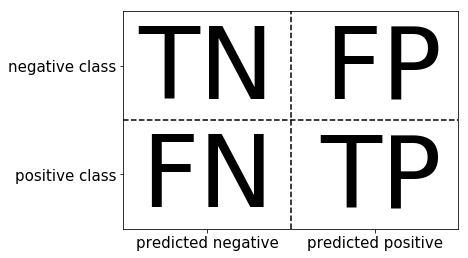

In [ ]:
#提示：混淆矩阵
Image('Snipaste_2020-01-05_16-38-26.png')

In [32]:
#提示：准确率 (Accuracy),精确度（Precision）,Recall,f-分数计算方法
Image('Snipaste_2020-01-05_16-39-27.png')

FileNotFoundError: ignored

FileNotFoundError: ignored

<IPython.core.display.Image object>

#### 提示5

**confusion_matrix** 混淆矩阵方法

* 混淆矩阵的方法在sklearn中的`sklearn.metrics`模块
* 混淆矩阵需要输入真实标签和预测标签 `confusion_matrix(y_train, pred)`

* 精确率、召回率以及f-分数可使用`classification_report`模块

In [33]:
#写入代码
from sklearn.metrics import confusion_matrix


In [34]:
#写入代码
# 训练模型
lr = LogisticRegression(C=100)
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=100)

In [37]:
#写入代码
# 模型预测结果
pred = lr.predict(X_train)
# 混淆矩阵
confusion_matrix(y_train, pred)

array([[354,  58],
       [ 83, 173]])

In [38]:
# 精确率、召回率以及f1-score
from sklearn.metrics import classification_report
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       412
           1       0.75      0.68      0.71       256

    accuracy                           0.79       668
   macro avg       0.78      0.77      0.77       668
weighted avg       0.79      0.79      0.79       668



【思考】
* 如果自己实现混淆矩阵的时候该注意什么问题

【回答】
* 计算的类别尽量`不要使用小数`作为类别
* 注意输入两个参数是`一维数组`，所以要是二维数组的话一定要先展成一维数组
* 第一个参数对应的是行标签(位于表格的列上)，第二个参数对应的是列标签（位于表格的行上）

#### 任务三：ROC曲线
* 绘制ROC曲线

【思考】什么是ROC曲线，OCR曲线的存在是为了解决什么问题？

【回答】
* ROC曲线  https://blog.csdn.net/ganxiwu9686/article/details/107709727

• 横坐标：Sensitivity，伪正类率(False positive rate， FPR)，预测为正但实际为负的样本占所有负例样本 的比例；
• 纵坐标：1-Specificity，真正类率(True positive rate， TPR)，预测为正且实际为正的样本占所有正例样本 的比例。

• 在一个二分类模型中，假设采用逻辑回归分类器，其给出针对每个实例为正类的概率，那么通过设定一个阈值如0.6，概率大于等于0.6的为正类，小于0.6的为负类。对应的就可以算出一组(FPR,TPR)，在平面中得到对应坐标点。随着阈值的逐渐减小，越来越多的实例被划分为正类，但是这些正类中同样也掺杂着真正的负实例，即TPR和FPR会同时增大。阈值最大时，对应坐标点为(0,0)，阈值最小时，对应坐标点(1,1)。

* 因为ROC曲线有个很好的特性：当测试集中的正负样本的分布变化的时候，ROC曲线能够保持不变。在实际的数据集中经常会出现类不平衡（class imbalance）现象，即负样本比正样本多很多（或者相反），而且测试数据中的正负样本的分布也可能随着时间变化。

#### 提示6
**roc_curve** 

```
fpr, tpr, thresholds = roc_curve(y_test, lr.decision_function(X_test))
```

* ROC曲线在sklearn中的模块为`sklearn.metrics`
* ROC曲线下面所包围的面积越大越好
* Parameters :

 > y_test 真实结果
 
 > lr.decision_function(X_test) 预测概率


In [39]:
#写入代码
from sklearn.metrics import roc_curve

**decision_function(X)**: 返回决策函数值

In [42]:
lr.decision_function(X_test)

array([-1.77604591, -1.68200059, -2.92069487, -2.72960293, -0.73891742,
        0.18458237,  0.41909197, -0.94792262, -2.19299611, -2.09267748,
       -2.09575333, -2.23937112, -0.72714495, -0.74339263,  1.55101273,
        2.26273231, -3.06144123, -1.45666397,  1.81728376,  1.10336334,
        2.79516822,  2.20610951, -2.08390509, -1.98258079, -2.62468103,
        2.6131129 ,  2.51498003,  0.45848361, -2.26657539, -1.89467814,
       -4.404265  , -2.44774792, -2.11419539,  0.26601063,  1.56295477,
       -3.49925717,  0.09272489,  3.16692301, -0.66404982, -2.16587794,
       -2.31608731, -0.7506547 ,  1.34325514, -0.68269633, -2.38074123,
       -1.47565237,  3.30022722,  0.37226753,  0.15221104, -2.39325623,
        0.70756456, -2.94022548,  0.05473853, -0.1186683 ,  0.22129913,
       -0.95561535, -2.91227353,  1.72897319, -2.30449411, -0.12694452,
       -2.40174927, -1.22870038, -3.04777742, -2.50564255, -2.91187293,
        0.37157039,  1.88118457, -1.73275495,  1.6105158 , -2.64

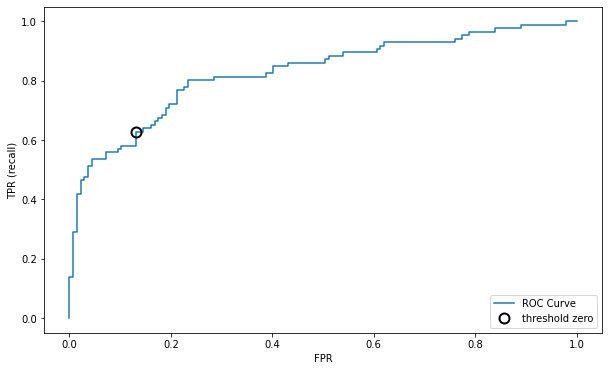

In [40]:
#写入代码
fpr, tpr, thresholds = roc_curve(y_test, lr.decision_function(X_test))
#绘制
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# 找到最接近于0的阈值
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)


#### 思考6
* 对于多分类问题如何绘制ROC曲线

【回答】 根据每个类型绘制对应ROC曲线（？）

【思考】你能从这条OCR曲线的到什么信息？这些信息可以做什么？

【回答】

* 随着阈值的逐渐减小，越来越多的实例被划分为正类，但是这些正类中同样也掺杂着真正的负实例，即TPR和FPR会同时增大。阈值最大时，对应坐标点为(0,0)，阈值最小时，对应坐标点(1,1)

* ROC曲线可以很容易地查出一个分类器在某个阈值时对样本的识别能力

* 可以借助ROC曲线选择出某一诊断方法最佳的诊断界限值(ROC曲线越是靠近左上角,试验的FPR越高和FPR越低,即灵敏度越高,误判率越低,则诊断方法的性能越好。可知ROC曲线上最靠近左上角的ROC曲线上的点其灵敏度和特异度....)

* ROC曲线可以用于比较两种或两种以上不同诊断方法对疾病的识别能力大小
(ROC曲线下面所包围的面积越大越好)
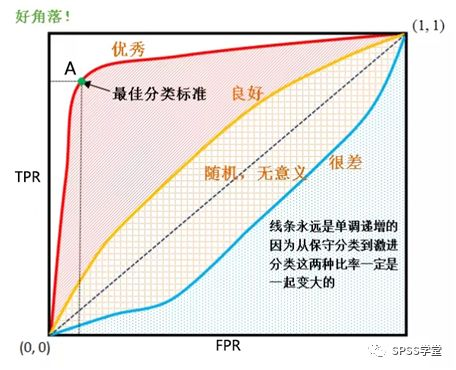